In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model as sk
import math
from sklearn import preprocessing

### First we need to load the database

In [ ]:
df2018 = pd.read_csv('ks-projects-201801.csv')

In [38]:
df2018.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

As discussed in the report, dropping features considered to be not useful to the implementation as we want.

In [39]:
df2018.drop(['ID', 'name', 'pledged', 'usd pledged', 'goal', 'category', 'backers'], axis=1, inplace=True)
df2018.shape

(378661, 8)

Checking if the columns were dropped correctly.

In [40]:
df2018.head()

main_category currency    deadline             launched     state country  \
0    Publishing      GBP  2015-10-09  2015-08-11 12:12:28    failed      GB   
1  Film & Video      USD  2017-11-01  2017-09-02 04:43:57    failed      US   
2  Film & Video      USD  2013-02-26  2013-01-12 00:20:50    failed      US   
3         Music      USD  2012-04-16  2012-03-17 03:24:11    failed      US   
4  Film & Video      USD  2015-08-29  2015-07-04 08:35:03  canceled      US   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

#### Checking how many states value our class label has

In [41]:
df2018.state.nunique()

6

#### Checking the values and their counts

In [42]:
df2018.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

#### Removing not used state values

In [43]:
flt_list = ['failed', 'successful', 'canceled', 'suspended']
df2018 = df2018[df2018.state.isin(flt_list)]
df2018.state.value_counts()

failed        197719
successful    133956
canceled       38779
suspended       1846
Name: state, dtype: int64

### Changing the dates for the time period that the project was live on the platform

In [44]:
label_column = 'state'
time_column = 'time_elapsed'

df2018['launched'] = pd.to_datetime(df2018['launched'])
df2018['deadline'] = pd.to_datetime(df2018['deadline'])
df2018[time_column] = (df2018.deadline - df2018.launched).astype('timedelta64[h]')

df2018.drop(['launched', 'deadline'], axis=1, inplace=True)

In [45]:
def showCorr(df):
    corr = df.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, cbar=None, annot=True, cmap='Blues')
    plt.show()

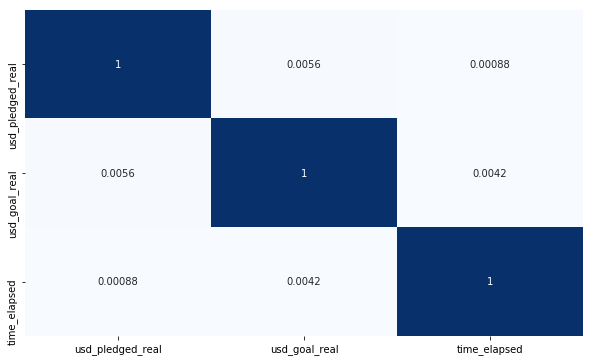

In [46]:
showCorr(df2018)

##### This copy was created just to make tests without altering the original dataset

In [48]:
df2018_copy = df2018.copy()
df2018_copy.head()

main_category currency     state country  usd_pledged_real  usd_goal_real  \
0    Publishing      GBP    failed      GB               0.0        1533.95   
1  Film & Video      USD    failed      US            2421.0       30000.00   
2  Film & Video      USD    failed      US             220.0       45000.00   
3         Music      USD    failed      US               1.0        5000.00   
4  Film & Video      USD  canceled      US            1283.0       19500.00   

   time_elapsed  
0        1403.0  
1        1435.0  
2        1079.0  
3         716.0  
4        1335.0

In [158]:
columns = ['main_category','currency', 'country']

#### Checking correlation between features

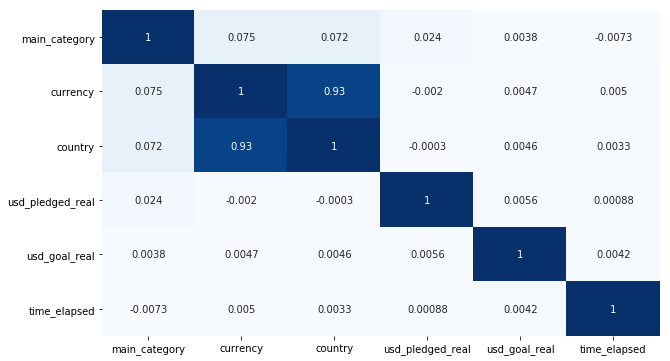

In [157]:
df2018_copy[columns] = df2018_copy[columns].apply(lambda x: pd.factorize(x)[0])
showCorr(df2018_copy)

In [50]:
df2018.head()

main_category currency     state country  usd_pledged_real  usd_goal_real  \
0    Publishing      GBP    failed      GB               0.0        1533.95   
1  Film & Video      USD    failed      US            2421.0       30000.00   
2  Film & Video      USD    failed      US             220.0       45000.00   
3         Music      USD    failed      US               1.0        5000.00   
4  Film & Video      USD  canceled      US            1283.0       19500.00   

   time_elapsed  
0        1403.0  
1        1435.0  
2        1079.0  
3         716.0  
4        1335.0

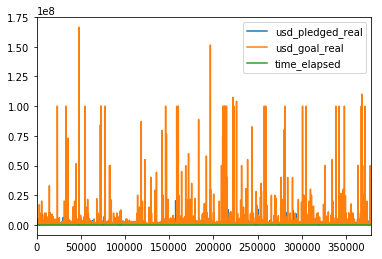

In [51]:
df2018.plot()
plt.show()

#### Converting categorical variable into dummy/indicator variables

In [52]:
def getDummies(df):
    return pd.get_dummies(df)

In [53]:
dummies = getDummies(df2018[columns])
dummies.head()

main_category_Art  main_category_Comics  main_category_Crafts  \
0                  0                     0                     0   
1                  0                     0                     0   
2                  0                     0                     0   
3                  0                     0                     0   
4                  0                     0                     0   

   main_category_Dance  main_category_Design  main_category_Fashion  \
0                    0                     0                      0   
1                    0                     0                      0   
2                    0                     0                      0   
3                    0                     0                      0   
4                    0                     0                      0   

   main_category_Film & Video  main_category_Food  main_category_Games  \
0                           0                   0                    0   
1                           1                   0                    0   
2                           1                   0                    0   
3                           0                   0                    0   
4                           1                   0                    0   

   main_category_Journalism     ...      country_JP  country_LU  country_MX  \
0                         0     ...               0           0           0   
1                         0     ...               0           0           0   
2                         0     ...               0           0           0   
3                         0     ...               0           0           0   
4                         0     ...               0           0           0   

   country_N,0"  country_NL  country_NO  country_NZ  country_SE  country_SG  \
0             0           0           0           0           0           0   
1             0           0           0           0           0           0   
2             0           0           0           0           0           0   
3             0           0           0           0           0           0   
4             0           0           0           0           0           0   

   country_US  
0           0  
1           1  
2           1  
3           1  
4           1  

[5 rows x 52 columns]

In [54]:
df2018.drop(columns, axis=1, inplace=True)

In [55]:
df2018 = pd.concat([df2018,dummies], axis=1)
df2018.shape

(372300, 56)

In [56]:
df2018.dropna(inplace=True)

In [57]:
y_target = df2018[label_column]
df2018 = df2018.drop([label_column], axis=1)

In [58]:
df2018.head()

usd_pledged_real  usd_goal_real  time_elapsed  main_category_Art  \
0               0.0        1533.95        1403.0                  0   
1            2421.0       30000.00        1435.0                  0   
2             220.0       45000.00        1079.0                  0   
3               1.0        5000.00         716.0                  0   
4            1283.0       19500.00        1335.0                  0   

   main_category_Comics  main_category_Crafts  main_category_Dance  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   main_category_Design  main_category_Fashion  main_category_Film & Video  \
0                     0                      0                           0   
1                     0                      0                           1   
2                     0                      0                           1   
3                     0                      0                           0   
4                     0                      0                           1   

      ...      country_JP  country_LU  country_MX  country_N,0"  country_NL  \
0     ...               0           0           0             0           0   
1     ...               0           0           0             0           0   
2     ...               0           0           0             0           0   
3     ...               0           0           0             0           0   
4     ...               0           0           0             0           0   

   country_NO  country_NZ  country_SE  country_SG  country_US  
0           0           0           0           0           0  
1           0           0           0           0           1  
2           0           0           0           0           1  
3           0           0           0           0           1  
4           0           0           0           0           1  

[5 rows x 55 columns]

In [59]:
def normalizeDF(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled, columns=df.columns)
    return df

In [60]:
df2018_norm = normalizeDF(df2018)
df2018_norm.head()

usd_pledged_real  usd_goal_real  time_elapsed  main_category_Art  \
0      0.000000e+00       0.000009      0.003492                0.0   
1      1.190325e-04       0.000180      0.003572                0.0   
2      1.081666e-05       0.000270      0.002686                0.0   
3      4.916666e-08       0.000030      0.001782                0.0   
4      6.308082e-05       0.000117      0.003323                0.0   

   main_category_Comics  main_category_Crafts  main_category_Dance  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  0.0   
4                   0.0                   0.0                  0.0   

   main_category_Design  main_category_Fashion  main_category_Film & Video  \
0                   0.0                    0.0                         0.0   
1                   0.0                    0.0                         1.0   
2                   0.0                    0.0                         1.0   
3                   0.0                    0.0                         0.0   
4                   0.0                    0.0                         1.0   

      ...      country_JP  country_LU  country_MX  country_N,0"  country_NL  \
0     ...             0.0         0.0         0.0           0.0         0.0   
1     ...             0.0         0.0         0.0           0.0         0.0   
2     ...             0.0         0.0         0.0           0.0         0.0   
3     ...             0.0         0.0         0.0           0.0         0.0   
4     ...             0.0         0.0         0.0           0.0         0.0   

   country_NO  country_NZ  country_SE  country_SG  country_US  
0         0.0         0.0         0.0         0.0         0.0  
1         0.0         0.0         0.0         0.0         1.0  
2         0.0         0.0         0.0         0.0         1.0  
3         0.0         0.0         0.0         0.0         1.0  
4         0.0         0.0         0.0         0.0         1.0  

[5 rows x 55 columns]

In [65]:
df2018_copy.drop(['state'], axis=1, inplace=True)

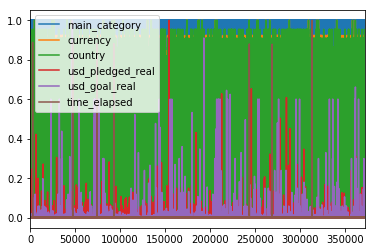

In [66]:
df2018_cp_norm = normalizeDF(df2018_copy)
df2018_cp_norm.plot()
plt.show()

In [67]:
def showPairPlot(df):
    sns.pairplot(df)
    plt.show()

#### Since the number of features increased to over 50, I tried to apply the PCA to see if we could have a dimentionality reduction

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#In general a good idea is to scale the data
scaler = StandardScaler()
scaler.fit(df2018)
X=scaler.transform(df2018)    

pca = PCA()
x_new = pca.fit_transform(X)

In [69]:
x_new

array([[  3.71316171e+00,  -3.65562990e+00,   1.43562831e-01, ...,
         -8.95042954e-16,  -2.56533507e-16,  -3.87270289e-17],
       [ -1.10225148e+00,  -1.81682926e-01,   4.74153542e-02, ...,
         -1.60139469e-17,  -2.57542597e-18,  -5.93754210e-17],
       [ -1.10078272e+00,  -1.84250926e-01,   4.80760350e-02, ...,
         -1.98113937e-15,  -3.69260890e-16,   7.52773495e-16],
       ..., 
       [ -1.10085673e+00,  -1.84373754e-01,   4.82518154e-02, ...,
          1.27113667e-17,  -4.85060070e-18,   1.67864622e-18],
       [ -7.74167320e-01,   2.90634462e-01,  -1.89753893e-01, ...,
          1.27643437e-17,  -1.28292930e-17,   2.09206691e-18],
       [ -1.01879982e+00,  -7.08951497e-02,   2.67225966e-02, ...,
          2.39339834e-17,  -5.64367967e-18,  -9.87130868e-18]])

In [70]:
pca_variance = pca.explained_variance_ratio_
pca_variance

array([  6.70678546e-02,   3.92369161e-02,   3.77556279e-02,
         3.72125575e-02,   3.66445898e-02,   3.65801060e-02,
         3.65449723e-02,   3.65099724e-02,   3.64576745e-02,
         3.64511236e-02,   3.64318004e-02,   3.64146207e-02,
         3.63687264e-02,   2.15559427e-02,   2.07497340e-02,
         2.05674017e-02,   2.00042608e-02,   1.99879921e-02,
         1.97812936e-02,   1.95447623e-02,   1.93790476e-02,
         1.89633040e-02,   1.87591260e-02,   1.87094904e-02,
         1.86634285e-02,   1.84727797e-02,   1.83923851e-02,
         1.83272019e-02,   1.82940238e-02,   1.82484935e-02,
         1.82357153e-02,   1.82038448e-02,   1.81808571e-02,
         1.81559117e-02,   1.81179619e-02,   1.80892452e-02,
         1.80297405e-02,   1.79237891e-02,   1.68926211e-02,
         2.59443459e-05,   2.48660733e-05,   1.49548303e-05,
         1.02334702e-05,   8.31451723e-06,   5.29674876e-06,
         3.49357616e-06,   3.79841415e-32,   3.54914190e-32,
         2.07333473e-32,

In [72]:
sum(pca_variance[0:39])

0.99990689643806208

In [73]:
pca = PCA(n_components=39)
x_new = pca.fit_transform(X)

In [74]:
x_new

array([[  3.71316171e+00,  -3.65562990e+00,   1.43562831e-01, ...,
         -1.08324700e-01,  -3.61931894e-02,   3.37657707e-01],
       [ -1.10225148e+00,  -1.81682926e-01,   4.74153542e-02, ...,
         -2.40970154e-01,   1.12719479e-01,   9.32268617e-02],
       [ -1.10078272e+00,  -1.84250926e-01,   4.80760350e-02, ...,
         -1.99405739e-01,   7.03761920e-03,   8.14941753e-02],
       ..., 
       [ -1.10085673e+00,  -1.84373754e-01,   4.82518154e-02, ...,
         -2.21454578e-01,   1.36327447e-02,   7.90919378e-02],
       [ -7.74167320e-01,   2.90634462e-01,  -1.89753893e-01, ...,
         -3.21130536e-01,  -2.32574829e-03,  -1.21639391e+00],
       [ -1.01879982e+00,  -7.08951497e-02,   2.67225966e-02, ...,
         -3.96563210e-02,   2.47105101e-01,   2.60771364e-01]])

In [75]:
nDF2018 = pd.DataFrame(np.round(x_new, 4))
nDF2018.head()

0       1       2       3       4       5       6       7       8   \
0  3.7132 -3.6556  0.1436 -0.2064 -0.3536  0.0742  0.0281  0.0054  0.0164   
1 -1.1023 -0.1817  0.0474  0.0245 -0.0016 -0.0511 -0.0194  0.0100  0.0114   
2 -1.1008 -0.1843  0.0481  0.0249 -0.0027 -0.0523 -0.0178  0.0114  0.0073   
3 -1.1877 -0.0447  0.0196 -0.0294  0.0167 -0.0407  0.0044 -0.0147  0.0142   
4 -1.1018 -0.1825  0.0477  0.0246 -0.0018 -0.0515 -0.0190  0.0105  0.0101   

       9    ...        29      30      31      32      33      34      35  \
0 -0.0466   ...    0.0759 -0.0404  0.1709  0.0214  0.3086  0.0185  0.2792   
1 -0.0023   ...   -0.0665 -0.0246  0.0659  0.0617  0.1097  0.0133  0.1051   
2 -0.0009   ...   -0.0786 -0.0131  0.0221  0.0246  0.0131 -0.0361 -0.0212   
3  0.0194   ...   -0.0037 -0.0049 -0.0177  0.0502  0.0632  0.1145  0.1137   
4 -0.0018   ...   -0.0730 -0.0208  0.0535  0.0515  0.0830 -0.0004  0.0664   

       36      37      38  
0 -0.1083 -0.0362  0.3377  
1 -0.2410  0.1127  0.0932  
2 -0.1994  0.0070  0.0815  
3 -0.1155 -0.7252  0.3492  
4 -0.2398  0.0848  0.0853  

[5 rows x 39 columns]

In [ ]:
X = np.array(df2018)
y = y_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89, shuffle=True)

In [76]:
def clf_score(clf, X_train, X_test, y_train, y_test):
    print "Starting..."
    clf.fit(X_train, y_train)
    print "Finished!"
    return clf.score(X_test, y_test)

#### Making a different function so we could test the PCA and the normalized distributions

In [ ]:
def clf_score_2(df, y_target, clf):
    X = np.array(df2018)
    y = y_target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89, shuffle=True)
    print "Starting..."
    clf.fit(X_train, y_train)
    print "Finished!"
    return clf.score(X_test, y_test)

### Start testing for default parameters on the models

In [77]:
score = clf_score(sk.LogisticRegression(), X_train, X_test, y_train, y_test)
score

Starting...
Finished!


0.84858984689766315

In [78]:
score_norm = clf_score_2(df2018_norm, y_target, sk.LogisticRegression())
score_norm

Starting...
Finished!


0.56244963738920228

In [79]:
score_pca = clf_score_2(nDF2018, y_target, sk.LogisticRegression())
score_pca

Starting...
Finished!


0.76978243352135378

In [80]:
from sklearn.neural_network import MLPClassifier

mlp_score = clf_score(MLPClassifier(alpha=1), X_train, X_test, y_train, y_test)
mlp_score

Starting...
Finished!


0.87539618587160895

In [81]:
mlp_score_norm = clf_score_2(df2018_norm, y_target, MLPClassifier(alpha=1))
mlp_score_norm

Starting...
Finished!


0.55558689229116309

In [82]:
mlp_score_pca = clf_score_2(nDF2018, y_target, MLPClassifier(alpha=1))
mlp_score_pca

Starting...
Finished!


0.71240934730056404

In [83]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_score = clf_score(GaussianNB(), X_train, X_test, y_train, y_test)
naive_bayes_score

Starting...
Finished!


0.47250872951920492

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn_score = clf_score(KNeighborsClassifier(n_neighbors=5), X_train, X_test, y_train, y_test)
knn_score

Starting...
Finished!


0.87369057211925871

### Defining functions to use GridSearch

In [85]:
from sklearn.metrics import f1_score

def performance_metric(y_true, y_predict):
    return f1_score(y_true, y_predict, average='micro')  

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def gridSearch(df, target, clf, parameters, scoring_func):
    sc_fnc = make_scorer(scoring_func)
# Maybe include cv parameter (cross-validation)
    gs = GridSearchCV(clf, parameters, scoring=sc_fnc)
    gs.fit(df, target)
    return gs.best_estimator_

In [87]:
y_target.head()

0      failed
1      failed
2      failed
3      failed
4    canceled
Name: state, dtype: object

In [88]:
df = pd.DataFrame(data = {'targ': y_target})
df = df.apply(lambda x: pd.factorize(x)[0])
y_targ = df['targ']
y_targ.head()

0    0
1    0
2    0
3    0
4    1
Name: targ, dtype: int64

## Start finding the best models for the passed parameters

In [89]:
knn_param = {'n_neighbors' : [3,5,7], 'weights' : ['uniform','distance']}
knn_model = gridSearch(df2018, y_targ, KNeighborsClassifier(), knn_param, performance_metric)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [92]:
knn_model_score = clf_score(knn_model, X_train, X_test, y_train, y_test)
knn_model_score

Starting...
Finished!


0.88176201987644376

In [120]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'sag'] }
model = gridSearch(df2018, y_targ, sk.LogisticRegression(), param_grid, performance_metric)
model

/Users/Vinicius/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [121]:
model_score = clf_score(model, X_train, X_test, y_train, y_test)
model_score

Starting...
Finished!


0.88681171098576417

In [122]:
mlp_param_grid = {'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.001, 0.01, 1], 'learning_rate': ['constant', 'invscaling', 'adaptive'] }
mlp_model = gridSearch(df2018, y_targ, MLPClassifier(), mlp_param_grid, performance_metric)

/Users/Vinicius/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [123]:
mlp_model

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [150]:
mlp_model_score = clf_score(mlp_model, X_train, X_test, y_train, y_test)
mlp_model_score

Starting...
Finished!


0.85048348106365834

In [116]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(random_state=37)
dTree_score = clf_score(dTree, X_train, X_test, y_train, y_test)
dTree_score

Starting...
Finished!


0.82170292774644105

In [117]:
tree_params = { 'criterion' : ['gini', 'entropy'], 'max_depth' : [7, 8, 9, 10], 'class_weight' : [None, 'balanced']}
dTree_model = gridSearch(df2018, y_targ, dTree, tree_params, performance_metric)
dTree_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=37,
            splitter='best')

In [118]:
dTree_score_2 = clf_score(dTree_model, X_train, X_test, y_train, y_test)
dTree_score_2

Starting...
Finished!


0.88930969648133229

In [119]:
y_test.head()

131837        failed
327458        failed
266885    successful
233208    successful
188608        failed
Name: state, dtype: object

In [112]:
y_pred = knn_model.predict(X_test)
y_pred

array(['failed', 'failed', 'successful', ..., 'canceled', 'failed',
       'successful'], dtype=object)

### Defining function needed to plot the confusion matrix.

It was acquired in the scikit-learn website as shown in the comment below

In [ ]:
# From http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [145]:
import itertools
from sklearn.metrics import confusion_matrix
def conf_matrix(model, X_test, y_test):
#     class_names = [0, 1, 2, 3]
    class_names = ['failed', 'successful', 'canceled', 'suspended']
    y_pred = model.predict(X_test)

    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')
    plt.show()

Confusion matrix, without normalization
[[  249  7299   166     0]
 [  881 38665    53     0]
 [    6    15 26742     0]
 [   10   309    65     0]]


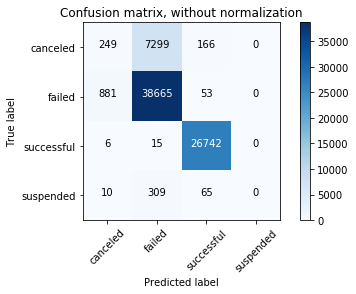

In [163]:
import itertools
from sklearn.metrics import confusion_matrix
# class_names = [0, 1, 2, 3]
class_names = ['canceled', 'failed', 'successful', 'suspended']
y_pred = knn_model.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

In [141]:
dTree_model_str_classes = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=37,
            splitter='best')
scr = clf_score(dTree_model_classes, X_train, X_test, y_train, y_test)
scr

Starting...
Finished!


0.88930969648133229

# Confusion Matrix

Confusion matrix, without normalization
[[   45  7479   188     2]
 [   74 39421   100     4]
 [    2     8 26752     1]
 [    0   317    67     0]]


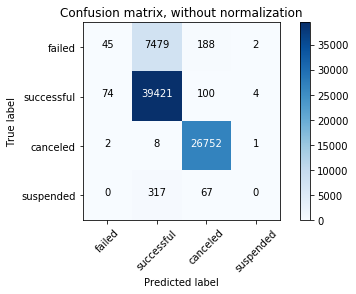

In [165]:
dTree_model_str_classes.fit(X_train, y_train)
conf_matrix(dTree_model_str_classes, X_test, y_test)

In [149]:
dTree_model_str_classes.score(X_test, y_test)

0.88930969648133229

A retest on the MLP to check if it I was missing something

In [166]:
new_mlp_model = MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
new_mlp_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [152]:
new_mlp_model.score(X_test, y_test)

0.8804055868922912